In [1]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Collecting data

url_tv_strategy = "http://161.97.165.206:57895/services/tv_internal_strategy"
data = pd.read_json(url_tv_strategy)

# data.columns = [
#     'time', 
#     'open', 
#     'high', 
#     'low', 
#     'close', 
#     'volume', 
#     'close_time', 
#     'quote_asset_volume', 
#     'number_of_trades', 
#     'taker_buy_base_asset_volume', 
#     'taker_buy_quote_asset_volume', 
#     'unused'
# ]

# data['date'] = pd.to_datetime(df['time'], unit='ms')
data.tail(5)

,time,Supertrend_$time,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,Supertrend_indicator,SMA_30_$time,SMA_30_MA,SMA_30_Smoothing_Line,SMA_30_indicator,...,candle_min,candle_volume,candle_indicator,round,round_position,round_position_value,round_close_at,round_lock_price,round_close_price,round_noroundid
996,1668325500,1668325500,280.80,1.000000e+100,281.464822,Supertrend,1668325500,280.956667,281.123333,SMA_30,...,280.6,70.10,candle,120111,Bear,0,2022-11-13 07:51:47,280.94996,280.8,
997,1668325320,1668325320,280.60,1.000000e+100,281.464822,Supertrend,1668325320,281.036667,281.214000,SMA_30,...,280.3,134.93,candle,120110,Bull,1,2022-11-13 07:46:41,280.07667816,280.94996,
998,1668324960,1668324960,279.50,1.000000e+100,281.464822,Supertrend,1668324960,281.196667,281.393333,SMA_30,...,279.1,70.02,candle,120109,Bull,1,2022-11-13 07:41:31,279.91924804,280.07667816,
999,1668324600,1668324600,280.45,1.000000e+100,281.464822,Supertrend,1668324600,281.410000,281.590000,SMA_30,...,279.8,417.33,candle,120108,Bear,0,2022-11-13 07:36:19,280.21,279.91924804,
1000,1668324420,1668324420,279.90,1.000000e+100,281.464822,Supertrend,1668324420,281.473333,281.688667,SMA_30,...,279.7,41.53,candle,120107,Bull,1,2022-11-13 07:31:10,280.17,280.21,


In [3]:
# Remove unused columns
data.drop([
    'time',
    'Supertrend_$time',
    'Supertrend_indicator',
    'SMA_30_$time',
    'SMA_30_indicator',
    'SMA_50_$time',
    'SMA_50_indicator',
    'SMA_100_$time',
    'SMA_100_indicator',
    'SMA_200_$time',
    'SMA_200_indicator',
    'EMA_30_$time',
    'EMA_30_indicator',
    'EMA_50_$time',
    'EMA_50_indicator',
    'EMA_100_$time',
    'EMA_100_indicator',
    'EMA_200_$time',
    'EMA_200_indicator',
    'RSI_$time',
    'RSI_indicator',
    'RSI_Upper_Bollinger_Band',
    'RSI_Lower_Bollinger_Band',
    'RSI_fill_1_colorer',
    'Stochastic_$time',
    'Stochastic_indicator',
    'Bollinger_Bands_$time',
    'Bollinger_Bands_indicator',
    'ATR_$time',
    'ATR_indicator',
    'candle_time',
    'candle_indicator',
    'round',
    'round_position',
    'round_close_at',
    'round_lock_price',
    'round_close_price'], axis=1, inplace=True)

data.tail(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
996,280.80,1.000000e+100,281.464822,280.956667,281.123333,281.988,282.0964,283.158,283.2056,282.5600,...,281.515877,279.264123,0.835477,280.9,280.7,280.9,280.6,70.10,0,
997,280.60,1.000000e+100,281.464822,281.036667,281.214000,282.042,282.1592,283.181,283.2320,282.5660,...,281.515877,279.264123,0.894975,280.5,280.7,281.2,280.3,134.93,1,
998,279.50,1.000000e+100,281.464822,281.196667,281.393333,282.142,282.2936,283.226,283.2832,282.5785,...,281.965896,279.064104,0.838240,279.6,279.4,279.6,279.1,70.02,1,
999,280.45,1.000000e+100,281.464822,281.410000,281.590000,282.302,282.4504,283.290,283.3362,282.5990,...,282.185104,279.304896,0.806469,279.9,281.0,281.0,279.8,417.33,0,
1000,279.90,1.000000e+100,281.464822,281.473333,281.688667,282.360,282.5276,283.305,283.3600,282.6020,...,282.204793,279.305207,0.751633,280.1,279.7,280.2,279.7,41.53,1,


In [4]:
data.head(1)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
0,270.3,1.000000e+100,270.688121,270.053333,270.048,270.128,270.214,270.907,270.888,271.3305,...,270.613498,269.266502,0.356469,270.4,270.2,270.4,270.2,16.29,,FIRST


In [5]:
# Set maindataset
main_data = data.copy()

In [6]:
# Separate FIRST to prediction set and remove from main data set, also remove round_noroundid column
data_prediction = main_data.loc[main_data['round_noroundid'] == 'FIRST'].copy()
data_prediction.drop(['round_noroundid'], axis=1, inplace=True)

main_data.drop(main_data[main_data['round_noroundid'] == 'FIRST'].index, inplace=True)
main_data.drop(['round_noroundid'], axis=1, inplace=True)

# Convert round position value (future y) to float
# main_data['round_position_value'] = pd.to_numeric(main_data['round_position_value'])
main_data['round_position_value'] = main_data['round_position_value'].astype(float)

data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
0,270.3,1.000000e+100,270.688121,270.053333,270.048,270.128,270.214,270.907,270.888,271.3305,...,269.94,270.613498,269.266502,0.356469,270.4,270.2,270.4,270.2,16.29,


In [7]:
main_data.head(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
1,270.35,1.000000e+100,270.688121,270.046667,270.043333,270.214,270.3008,270.884,270.8718,271.362,...,269.930,270.584523,269.275477,0.359839,270.4,270.3,270.5,270.1,31.46,0.0
2,270.15,1.000000e+100,270.688121,270.043333,270.032000,270.300,270.3864,270.871,270.8642,271.389,...,269.920,270.544820,269.295180,0.350418,270.1,270.2,270.3,270.1,98.14,1.0
3,270.20,1.000000e+100,270.688121,270.043333,270.022667,270.344,270.4308,270.865,270.8652,271.404,...,269.930,270.578383,269.281617,0.367131,270.2,270.2,270.3,270.0,26.42,1.0
4,270.20,1.000000e+100,270.688121,270.023333,270.008667,270.426,270.5164,270.859,270.8794,271.434,...,269.920,270.554350,269.285650,0.371767,270.2,270.2,270.3,270.1,39.14,0.0
5,270.00,1.000000e+100,270.688121,269.996667,270.019333,270.522,270.6088,270.876,270.9044,271.462,...,269.935,270.608127,269.261873,0.400947,270.0,270.0,270.1,269.8,39.74,1.0


In [8]:
main_data.dtypes

Supertrend_Plot           float64
Supertrend_Up_Trend       float64
Supertrend_Down_Trend     float64
SMA_30_MA                 float64
SMA_30_Smoothing_Line     float64
SMA_50_MA                 float64
SMA_50_Smoothing_Line     float64
SMA_100_MA                float64
SMA_100_Smoothing_Line    float64
SMA_200_MA                float64
SMA_200_Smoothing_Line    float64
EMA_30_EMA                float64
EMA_30_Smoothing_Line     float64
EMA_50_EMA                float64
EMA_50_Smoothing_Line     float64
EMA_100_EMA               float64
EMA_100_Smoothing_Line    float64
EMA_200_EMA               float64
EMA_200_Smoothing_Line    float64
RSI_RSI                   float64
RSI_RSIbased_MA           float64
Stochastic_K              float64
Stochastic_D              float64
Bollinger_Bands_Basis     float64
Bollinger_Bands_Upper     float64
Bollinger_Bands_Lower     float64
ATR_ATR                   float64
candle_open               float64
candle_close              float64
candle_max    

In [9]:
# Create X & y values (features and labels)

# The X (independent variables) will be every column of DataFrame except charges
X = main_data.drop("round_position_value", axis=1)

# The y (dependent or label) is charges column
y = main_data["round_position_value"]

# Remove from data_prediction the empty round_position_value
data_prediction.drop("round_position_value", axis=1, inplace=True)

In [10]:
X.head()

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
1,270.35,1.000000e+100,270.688121,270.046667,270.043333,270.214,270.3008,270.884,270.8718,271.362,...,78.666667,269.930,270.584523,269.275477,0.359839,270.4,270.3,270.5,270.1,31.46
2,270.15,1.000000e+100,270.688121,270.043333,270.032000,270.300,270.3864,270.871,270.8642,271.389,...,72.000000,269.920,270.544820,269.295180,0.350418,270.1,270.2,270.3,270.1,98.14
3,270.20,1.000000e+100,270.688121,270.043333,270.022667,270.344,270.4308,270.865,270.8652,271.404,...,68.583333,269.930,270.578383,269.281617,0.367131,270.2,270.2,270.3,270.0,26.42
4,270.20,1.000000e+100,270.688121,270.023333,270.008667,270.426,270.5164,270.859,270.8794,271.434,...,60.500000,269.920,270.554350,269.285650,0.371767,270.2,270.2,270.3,270.1,39.14
5,270.00,1.000000e+100,270.688121,269.996667,270.019333,270.522,270.6088,270.876,270.9044,271.462,...,47.500000,269.935,270.608127,269.261873,0.400947,270.0,270.0,270.1,269.8,39.74


In [11]:
y.head(20)

1     0.0
2     1.0
3     1.0
4     0.0
5     1.0
6     0.0
7     1.0
8     1.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    1.0
15    1.0
16    0.0
17    1.0
18    0.0
19    1.0
20    1.0
Name: round_position_value, dtype: float64

In [12]:
data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
0,270.3,1.000000e+100,270.688121,270.053333,270.048,270.128,270.214,270.907,270.888,271.3305,...,83.619048,269.94,270.613498,269.266502,0.356469,270.4,270.2,270.4,270.2,16.29


In [75]:
# Split dataset in random set to train using sklearn
# Separate 20% (0.2) for test and 80% to train
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
X_train.shape, y_train.shape

((800, 32), (800,))

In [77]:
X_test.shape, y_test.shape

((200, 32), (200,))

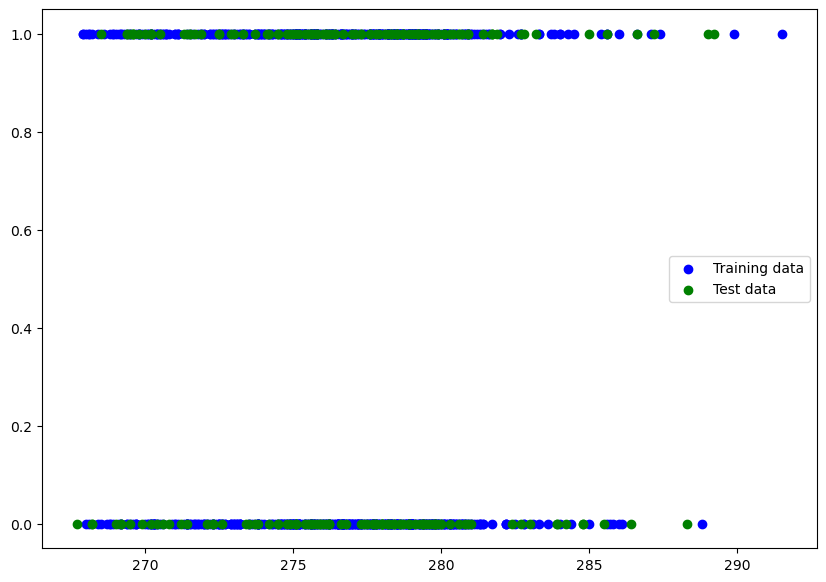

In [107]:
# Visualize the data
plt.figure(figsize=(10, 7))

plt.scatter(X_train['candle_close'], y_train, c="b", label="Training data")

plt.scatter(X_test['candle_close'], y_test, c="g", label="Test data")

# Show a legend
plt.legend(); # Use this semicolon at and to set end

In [78]:
# Normalize data


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [
        "Supertrend_Plot",
        "Supertrend_Up_Trend",
        "Supertrend_Down_Trend",
        "SMA_30_MA",
        "SMA_30_Smoothing_Line",
        "SMA_50_MA",
        "SMA_50_Smoothing_Line",
        "SMA_100_MA",
        "SMA_100_Smoothing_Line",
        "SMA_200_MA",
        "SMA_200_Smoothing_Line",
        "EMA_30_EMA",
        "EMA_30_Smoothing_Line",
        "EMA_50_EMA",
        "EMA_50_Smoothing_Line",
        "EMA_100_EMA",
        "EMA_100_Smoothing_Line",
        "EMA_200_EMA",
        "EMA_200_Smoothing_Line",
        "RSI_RSI",
        "RSI_RSIbased_MA",
        "Stochastic_K",
        "Stochastic_D",
        "Bollinger_Bands_Basis",
        "Bollinger_Bands_Upper",
        "Bollinger_Bands_Lower",
        "ATR_ATR",
        "candle_open",
        "candle_close",
        "candle_max",
        "candle_min",
        "candle_volume"]) # turn all values in these columns between 0 and 1
)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
data_prediction_normal = ct.transform(data_prediction)

In [79]:
X_train.head(1), X_train_normal[0]

(     Supertrend_Plot  Supertrend_Up_Trend  Supertrend_Down_Trend   SMA_30_MA  \
 525            278.3           277.557363          1.000000e+100  277.363333   
 
      SMA_30_Smoothing_Line  SMA_50_MA  SMA_50_Smoothing_Line  SMA_100_MA  \
 525                277.086    276.246               276.0916      275.06   
 
      SMA_100_Smoothing_Line  SMA_200_MA  ...  Stochastic_D  \
 525                275.0276    276.2185  ...     66.699634   
 
      Bollinger_Bands_Basis  Bollinger_Bands_Upper  Bollinger_Bands_Lower  \
 525                278.345             279.557394             277.132606   
 
       ATR_ATR  candle_open  candle_close  candle_max  candle_min  \
 525  0.647812        278.0         278.6       278.6       277.9   
 
      candle_volume  
 525          201.2  
 
 [1 rows x 32 columns],
 array([4.58333333e-001, 9.29892879e-100, 1.00000000e+000, 4.79712283e-001,
        4.64437309e-001, 4.36253354e-001, 4.27894762e-001, 3.75589280e-001,
        3.73133556e-001, 4.3297820

In [301]:
# Build a neural network model to fit on our normalized data

# tf.random.set_seed(42)

# 1. Create the model (based on insurance_model_2)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, name="hidden_layer_1", activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, name="hidden_layer_2", activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(80, name="hidden_layer_3", activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, name="last_layer", activation=tf.keras.activations.linear)
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001, decay=0.00001 / 200),
                          metrics=["mae"])

# 3. Fit the model
history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=100, batch_size=4, verbose=0)
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=4800, batch_size=4, verbose=0) # 36%
# history_training_model_1 = model_1.fit(X_train.to_numpy(), y_train, epochs=800, batch_size=4, verbose=0)

In [302]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (4, 200)                  6600      
                                                                 
 hidden_layer_2 (Dense)      (4, 200)                  40200     
                                                                 
 hidden_layer_3 (Dense)      (4, 80)                   16080     
                                                                 
 last_layer (Dense)          (4, 1)                    81        
                                                                 
Total params: 62,961
Trainable params: 62,961
Non-trainable params: 0
_________________________________________________________________


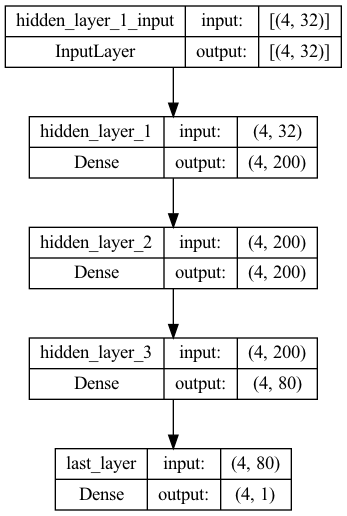

In [303]:
plot_model(model_1, show_shapes=True)

In [304]:
# Evaluate our insurance model trained on normalized data

model_1.evaluate(X_test_normal, y_test)
# model_1.evaluate(X_test.to_numpy(), y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.4052 - mae: 0.4052


[0.4051729440689087, 0.4051729440689087]

Text(0.5, 0, 'epochs')

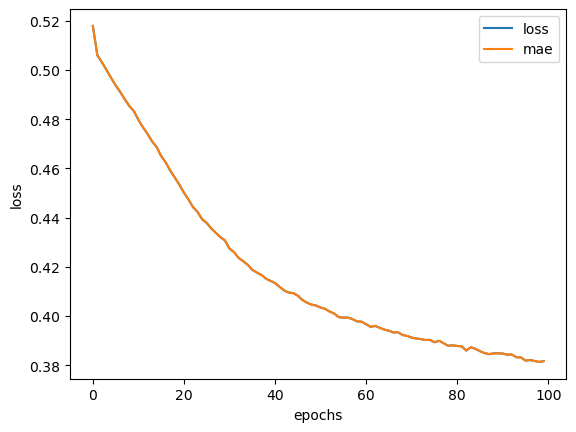

In [305]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history_training_model_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [306]:
# Try and make a prediction using our model
y_pred = model_1.predict(data_prediction_normal)
# y_pred = model_1.predict(data_prediction.to_numpy())
y_pred

1/1 [==============================] - 0s 30ms/step


array([[0.86680484]], dtype=float32)

In [307]:
y_pred[0][0]

0.86680484